efsdf

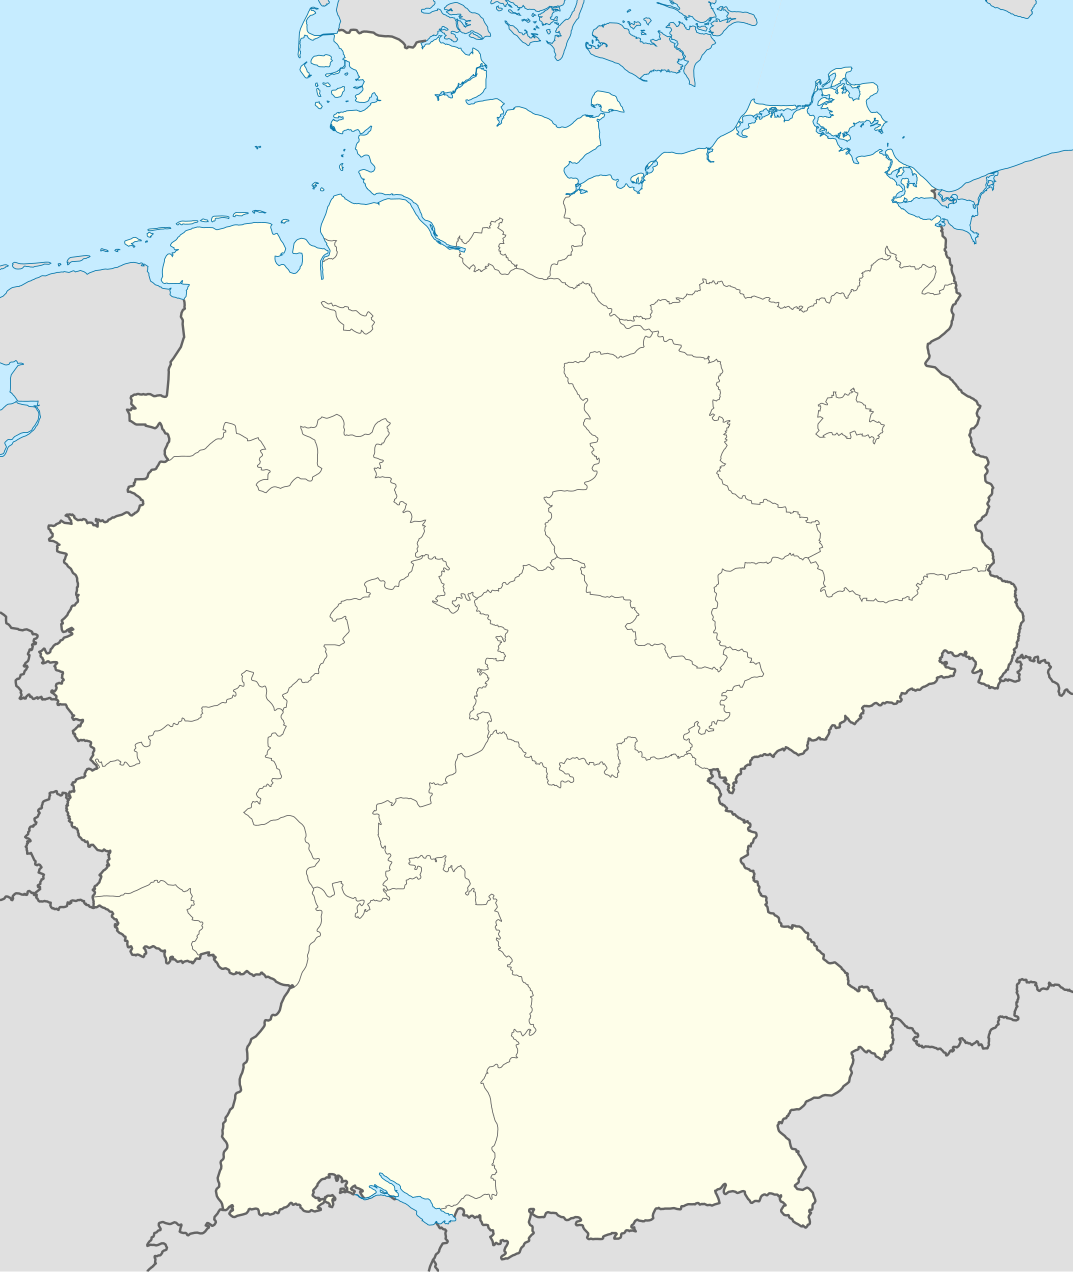

In [14]:
import requests
import tempfile
from IPython.display import Image

url = "https://raw.githubusercontent.com/Octoframes/bpy-workshop/refs/heads/main/Germany_location_map.png"
response = requests.get(url)

# Create a temporary file to store the image
temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False)
temp_file.write(response.content)
temp_file.close()

# https://upload.wikimedia.org/wikipedia/commons/0/0d/Germany_location_map.svg
# Define the coordinate bounds
north = 55.1  # Northern latitude in deg
south = 47.2  # Southern latitude in deg
west = 5.5    # Western longitude in deg
east = 15.5   # Eastern longitude in deg


import bpy

# https://upload.wikimedia.org/wikipedia/commons/0/0d/Germany_location_map.svg
# Define the coordinate bounds
north = 55.1  # Northern latitude in deg
south = 47.2  # Southern latitude in deg
west = 5.5    # Western longitude in deg
east = 15.5   # Eastern longitude in deg

offset_x = 0# -8
offset_y = 0 #-50

# Calculate the center coordinates of the bounding box
center_x = (west + east) / 2
center_y = (north + south) / 2

map_location = (center_x + offset_x, center_y + offset_y, 0)
# Add the plane and set it at the calculated center location
bpy.ops.mesh.primitive_plane_add(size=1, location=map_location)
plane = bpy.context.active_object  # Use active_object instead of object to ensure we get the actual object

# Check if plane was created successfully
if plane is None or not hasattr(plane, 'data'):
    print("Error: Could not create plane object")
else:
    # Create a new material and assign the image texture
    material = bpy.data.materials.new(name="ImageMaterial")
    material.use_nodes = True
    bsdf = material.node_tree.nodes["Principled BSDF"]

    # Add and load the image texture
    tex_image = material.node_tree.nodes.new('ShaderNodeTexImage')

    import pathlib

    tex_image.image = bpy.data.images.load(str(temp_file.name))

    # Connect the texture to the Base Color of the BSDF shader
    material.node_tree.links.new(bsdf.inputs['Base Color'], tex_image.outputs['Color'])
    
    # Only append material if plane exists and has data
    plane.data.materials.append(material)

    # Calculate the scale based on the geographic bounds
    plane.scale.x = (east - west)
    plane.scale.y = (north - south)






Image(temp_file.name, width=300)
